## TUTORIAL OF PYTORCH API 02 ==> REGRESSION

## 1_Linear Regression

In [20]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn import datasets

### Making and Preparing dataset

In [21]:
x_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x_train = torch.from_numpy(x_np.astype(np.float32))
y_train = torch.from_numpy(y_np.astype(np.float32))

### Exploring dataset

In [22]:
print("X_train: ",x_train.shape)
print("Y_train: ",y_train.shape)

y_train = y_train.reshape(-1,1)
print("Atfer Reshape: ",y_train.shape)

n_example, n_features = x_train.shape
print("Number of examples: ", n_example)
print("Number of features: ", n_features)

X_train:  torch.Size([100, 1])
Y_train:  torch.Size([100])
Atfer Reshape:  torch.Size([100, 1])
Number of examples:  100
Number of features:  1


### Build Model

In [38]:
model = torch.nn.Linear(in_features=n_features, out_features=y_train.shape[1])

### Select Hyperparameters

In [39]:
losses = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
n_iters = 100

### Call Model

In [40]:
for epoch in range(n_iters):
    #forward
    y_hat = model(x_train)
    
    #cost function
    loss = losses(y_hat, y_train)

    #backward
    loss.backward()

    #update parameters
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f"Epoch {epoch} , w= {w.item()}, b= {b.item()}")


Epoch 0 , w= 2.0219597816467285, b= 0.9309483170509338
Epoch 10 , w= 13.856293678283691, b= 2.331000804901123
Epoch 20 , w= 23.94035530090332, b= 3.3531064987182617
Epoch 30 , w= 32.534767150878906, b= 4.084412097930908
Epoch 40 , w= 39.861026763916016, b= 4.593443393707275
Epoch 50 , w= 46.10743713378906, b= 4.93391227722168
Epoch 60 , w= 51.434120178222656, b= 5.147768020629883
Epoch 70 , w= 55.9772834777832, b= 5.26763916015625
Epoch 80 , w= 59.85282897949219, b= 5.318786144256592
Epoch 90 , w= 63.159385681152344, b= 5.320653915405273


### Plot to visualize dataset

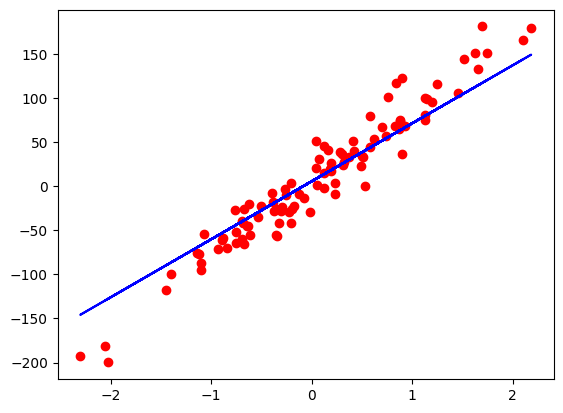

In [43]:
predicted = model(x_train).detach().numpy()
plt.plot(x_np, y_np, 'ro')
plt.plot(x_np, predicted, 'b')
plt.show()

## Logistic Regression

In [53]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd

### Making, Loading and Preparing dataset

In [54]:
bc = datasets.load_breast_cancer()
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Exploring dataset

In [55]:
X, y = bc.data, bc.target
n_examples, n_features = X.shape
print("Number of examples ", n_examples)
print("Number of features ", n_features)
print(y.shape)

Number of examples  569
Number of features  30
(569,)


### Normalize for faster training

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Convert Numpy to PyTorch

In [59]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [60]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(y_train.shape)
print(y_test.shape)

torch.Size([455, 1])
torch.Size([114, 1])


### Build Class Model

In [63]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_features):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_features, 1)

    def forward(self, x):
        y_hat = torch.sigmoid(self.linear(x))
        return y_hat

In [64]:
model = LogisticRegression(n_features)

### Select Hyperparameters

In [65]:
losses = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
n_inters = 100

In [68]:
for epoch in range(n_iters):
    #forward
    y_hat = model(X_train)
    
    #cost function
    loss = losses(y_hat, y_train)

    #backward
    loss.backward()

    #update parameters
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        #[w,b] = model.parameters()
        print(f"Epoch {epoch} , loss= {loss.item()}")

Epoch 0 , loss= 0.5382748246192932
Epoch 10 , loss= 0.4615521728992462
Epoch 20 , loss= 0.40943673253059387
Epoch 30 , loss= 0.3715575933456421
Epoch 40 , loss= 0.34262698888778687
Epoch 50 , loss= 0.3196857273578644
Epoch 60 , loss= 0.3009543716907501
Epoch 70 , loss= 0.28530046343803406
Epoch 80 , loss= 0.27196958661079407
Epoch 90 , loss= 0.26043999195098877


### Evaluation

In [80]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted > 0.5
    print("Some predict examples :", y_predicted_cls[:10])
    print("Some truth examples :", y_test[:10])
    accuracy = y_predicted_cls.eq(y_test).sum()/ y_test.shape[0]
    print("Accuracy ", accuracy.item()*100)

Some predict examples : tensor([[ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]])
Some truth examples : tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]])
Accuracy  96.49122953414917
